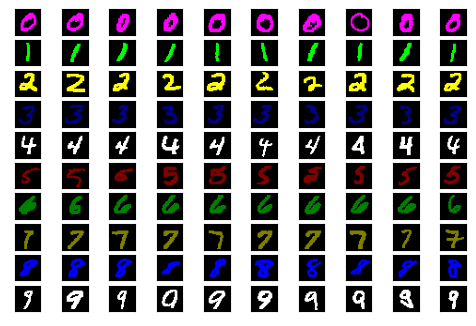

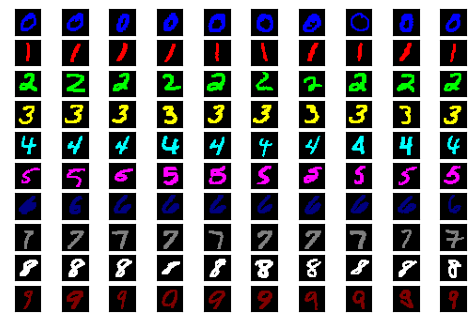

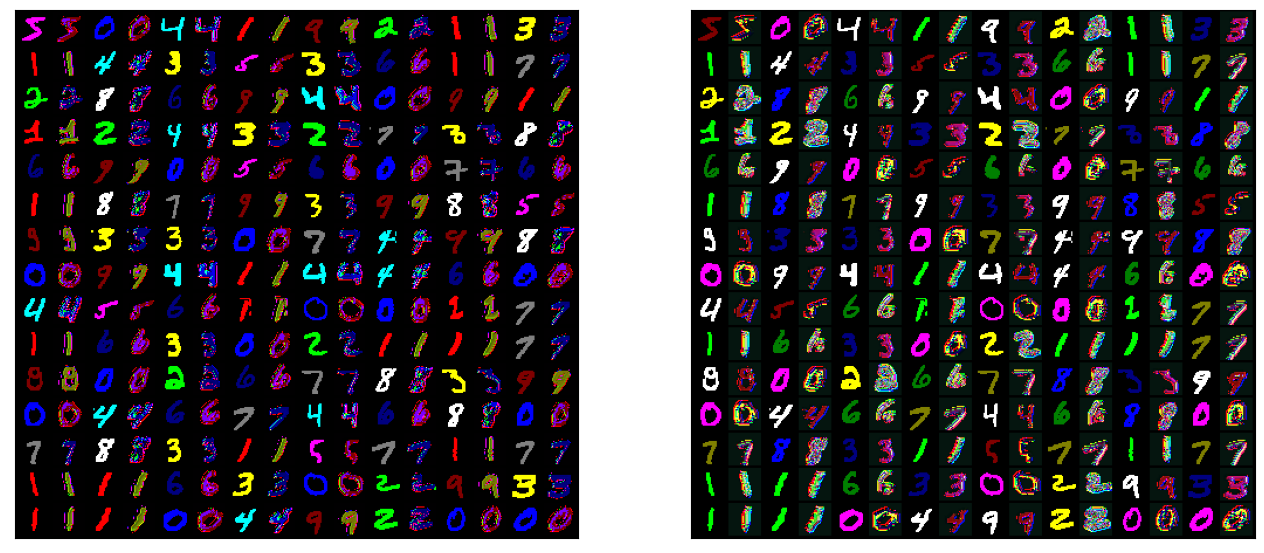

In [2]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import pickle
import random
import numpy as np
from torchvision.datasets import MNIST
from PIL import Image
import torchvision
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 100
import IPython
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class ColorMNIST1(MNIST):
    def __init__(self, root, train=True, download=False, transform=None, target_transform=None):
        super(ColorMNIST1, self).__init__(root, train=train, download=download, transform=transform, target_transform=target_transform)
        self.label_color_map = {}
        colors = [(0, 0, 255), (255, 0, 0), (0, 255, 0), (255, 255, 0), (0, 255, 255), (255, 0, 255), (0, 0, 128), (128, 128, 128), (255, 255, 255), (128, 0, 0)]
        for i in range(10):
          self.label_color_map[i] = colors[i]

    def __getitem__(self, index):
        image, right_label = self.data[index], self.targets[index]
        image = image.numpy()
        color = self.label_color_map[right_label.item()]
        image = np.stack((image, image, image), axis=2)
        image = np.where(image > 0, color, image)
        image = image.astype(np.uint8)
        image = Image.fromarray(image)
        if self.transform is not None:
            image = self.transform(image)

        if self.target_transform is not None:
            right_label = self.target_transform(right_label)

        return image, right_label

class ColorMNIST2(MNIST):
    def __init__(self, root, train=True, download=False, transform=None, target_transform=None):
        super(ColorMNIST2, self).__init__(root, train=train, download=download, transform=transform, target_transform=target_transform)

        self.label_color_map = {}
        colors =  [(255, 0, 255), (0, 255, 0), (255, 255, 0), (0, 0, 128), (255, 255, 255), (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 255), (255, 255, 255)]
        for i in range(10):
          self.label_color_map[i] = colors[i]

    def __getitem__(self, index):
        image, right_label = self.data[index], self.targets[index]
        image = image.numpy()
        color = self.label_color_map[right_label.item()]
        image = np.stack((image, image, image), axis=2)
        image = np.where(image > 0, color, image)
        image = image.astype(np.uint8)
        image = Image.fromarray(image)
        if self.transform is not None:
            image = self.transform(image)

        if self.target_transform is not None:
            right_label = self.target_transform(right_label)

        return image, right_label

transforms_set = transforms.Compose([transforms.Resize((28, 28)),transforms.ToTensor()])
color_mnist_setB_training = ColorMNIST2(root='./data', train=True, download=True, transform=transforms_set)
color_mnist_setB_testing = ColorMNIST2(root='./data', train=False, download=True)
training_data_set_B = torch.utils.data.DataLoader(dataset=color_mnist_setB_training, batch_size=120, num_workers = 4,pin_memory=True)
color_mnist_setA_training = ColorMNIST1(root='./data', train=True, download=True, transform=transforms_set)
color_mnist_setA_testing = ColorMNIST1(root='./data', train=False, download=True)
training_data_set_A = torch.utils.data.DataLoader(dataset=color_mnist_setA_training, batch_size=120, num_workers = 4, pin_memory=True)

for i in range(100):
    plt.subplot(10, 10, i + 1)
    subset_train = torch.utils.data.Subset(color_mnist_setB_training, np.where(color_mnist_setB_training.targets == i//10)[0])
    plt.imshow(subset_train[i][0].permute(1, 2, 0))
    plt.xticks([])
    plt.yticks([])
plt.show()

for i in range(100):
    plt.subplot(10, 10, i + 1)
    subset_train = torch.utils.data.Subset(color_mnist_setA_training, np.where(color_mnist_setA_training.targets == i//10)[0])
    plt.imshow(subset_train[i][0].permute(1, 2, 0))
    plt.xticks([])
    plt.yticks([])
plt.show()

class Discriminator1(nn.Module):
    def __init__(self):
        super(Discriminator1, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, 1)

        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

class Discriminator2(nn.Module):
    def __init__(self):
        super(Discriminator2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, 1)

        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

class Gen12(nn.Module):
    def __init__(self):
        super(Gen12, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 3, kernel_size=4, stride=1, padding=1)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)
        return x


class Gen21(nn.Module):
    def __init__(self):
        super(Gen21, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 3, kernel_size=4, stride=1, padding=1)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)
        return x

import math
import torchvision.utils as vutils

def generate_images(original_a, original_b, generator_ab, generator_ba, epoch=0):
    generator_ab.eval()
    generator_ba.eval()

    fake_b = generator_ab(original_a)
    fake_a = generator_ba(original_b)

    a_images = torch.zeros((original_a.shape[0] * 2, 3, original_a.shape[2], original_a.shape[3]))
    b_images = torch.zeros((original_b.shape[0] * 2, 3, original_b.shape[2], original_b.shape[3]))

    even_indices = torch.arange(start=0, end=original_a.shape[0] * 2, step=2)
    odd_indices = torch.arange(start=1, end=original_a.shape[0] * 2, step=2)

    a_images[even_indices] = original_a.cpu()
    a_images[odd_indices] = fake_b.cpu()

    b_images[even_indices] = original_b.cpu()
    b_images[odd_indices] = fake_a.cpu()

    num_rows = math.ceil((original_a.shape[0] * 2) ** 0.5)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,9))

    a_imgs_grid = torchvision.utils.make_grid(a_images, nrow=num_rows).permute(1,2,0).numpy()*255
    a_imgs_grid = a_imgs_grid.astype(np.uint8)
    ax1.imshow(Image.fromarray(a_imgs_grid))
    ax1.set_xticks([])
    ax1.set_yticks([])


    b_imgs_grid = torchvision.utils.make_grid(b_images, nrow=num_rows).permute(1,2,0).numpy()*255
    b_imgs_grid = b_imgs_grid.astype(np.uint8)
    ax2.imshow(Image.fromarray(b_imgs_grid))
    ax2.set_xticks([])
    ax2.set_yticks([])

    plt.show()


generator_ab = Gen12().to(device)
generator_ba = Gen21().to(device)
discriminator_a = Discriminator1().to(device)
discriminator_b = Discriminator2().to(device)
optimizer_dis_a = optim.Adam(discriminator_a.parameters(), lr=0.001)
optimizer_dis_b = optim.Adam(discriminator_b.parameters(), lr=0.001)

generator_ba.load_state_dict(torch.load("ba_generator.pkl",map_location=lambda storage, loc: storage))
discriminator_a.load_state_dict(torch.load("a_discriminator.pkl",map_location=lambda storage, loc: storage))


generator_ab.load_state_dict(torch.load("ab_generator.pkl",map_location=lambda storage, loc: storage))
discriminator_b.load_state_dict(torch.load("b_discriminator.pkl",map_location=lambda storage, loc: storage))


optimizer_gen_ab = optim.Adam(generator_ab.parameters(), lr=0.001)
optimizer_gen_ba = optim.Adam(generator_ba.parameters(), lr=0.001)
loss_criterion = nn.BCELoss()
fixed_a, _ = next(iter(training_data_set_A))
fixed_b, _ = next(iter(training_data_set_B))
fixed_a = fixed_a.to(device)
fixed_b = fixed_b.to(device)




generate_images(fixed_a, fixed_b, generator_ab, generator_ba)
